<a href="https://colab.research.google.com/github/AgustinGurvich/TMD/blob/main/TMD_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabajo Práctico 1

Apartado 1: Conjunto de Datos Diagonal

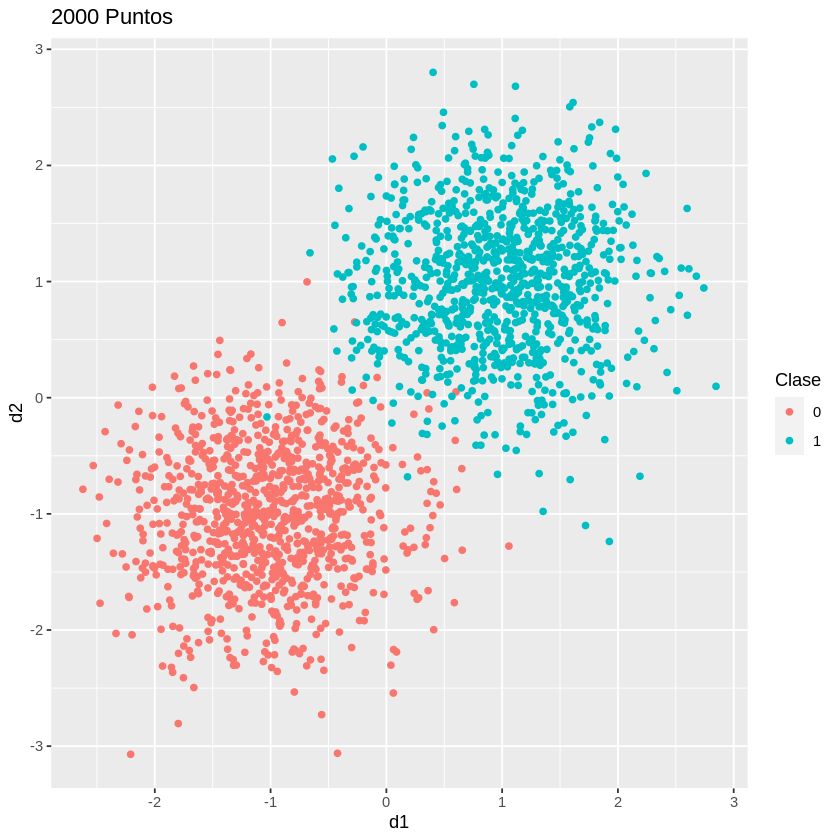

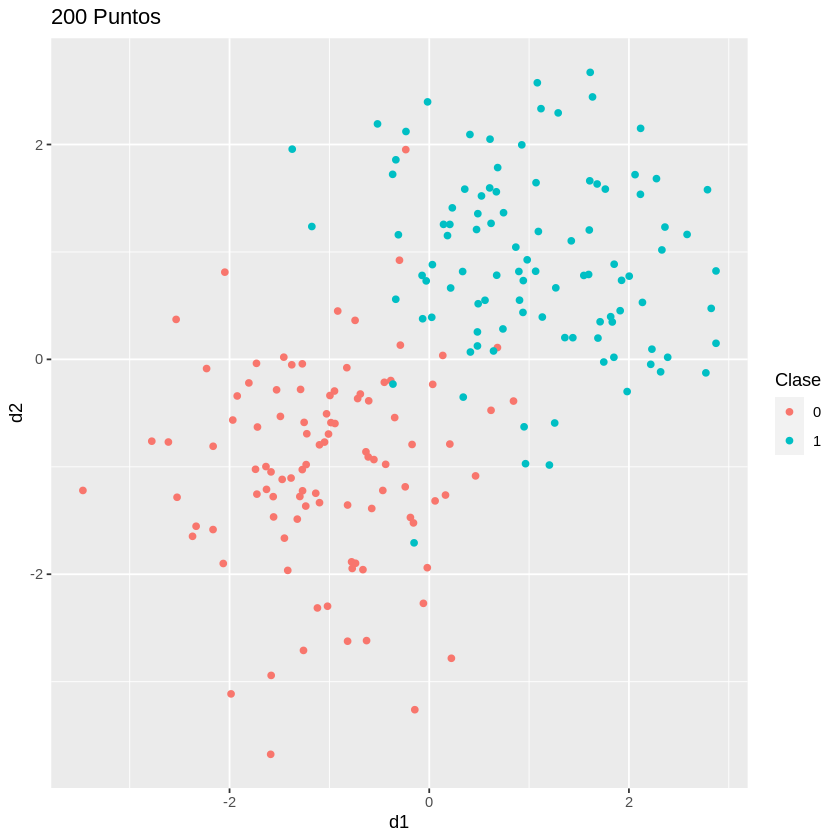

In [ ]:
library(MASS)
library(ggplot2)
diagonal <- function(n,d,C){
std_dev <- C * sqrt(d) 
covariance_matrix = diag(std_dev, d, d)
centerClass1 = rep(1, times=d)
centerClass0 = rep(-1, times=d)
size1 = floor(n/2)
size0 = ceiling(n/2)
points1 <- mvrnorm(size1, centerClass1, covariance_matrix)
points0 <- mvrnorm(size0, centerClass0, covariance_matrix)
class1 <- cbind(points1, rep(1, times=d))
class0 <- cbind(points0, rep(0, times=d))
columnNames <- c(paste0("d", seq(1,d)),"class")
f <- as.data.frame(rbind(class0,class1))
colnames(f) <- columnNames
return (f)
}

diagPoints2000 <- diagonal(2000,2,0.25)
ggplot(diagPoints2000, 
       aes(x=d1, 
           y=d2,
           color = factor(class))) +
  geom_point() + 
  labs(title = "2000 Puntos", colour  = "Clase")

diagPoints200 <- diagonal(200,2,0.5)
ggplot(diagPoints200, 
       aes(x=d1, 
           y=d2,
           color = factor(class))) +
  geom_point() + 
  labs(title = "200 Puntos", colour  = "Clase")

In [ ]:
f1 <- function(theta){
  return (theta/(4*pi))
}

f2 <- function(theta){
  return ((theta + pi)/ (4*pi))
}

espiral <- function(n){
  #Buscamos generar n puntos: la mitad de cada clase
  size0 <- floor(n/2)
  size1 <- ceiling(n/2)

  #¿Cuantos de cada clase generamos?
  acumClass0 <- 0
  acumClass1 <- 0

  #Dataframe a crear
  points <- data.frame()

  #Valor 2 * pi
  pi2 <- 2 * pi  

  #Empezamos a generar puntos hasta llenar las clases
  while(acumClass0 < size0 || acumClass1 < size1){
    #Armamos un punto en coordenadas polares
    r <- sqrt(runif(1,0,1))
    theta <-  pi2 * runif(1,0,1)

    #Usamos estos valores para recorres las curvas y revisar que el punto se 
    #encuentre entre ellas
    circleLoops <- seq(-1,5,1)
    circleLoops <- (circleLoops * pi2) + theta
    #Para guardar a que clase pertenece
    between = F

    for(loop in circleLoops){
      if(f1(loop) < r && r < f2(loop)){ #Esta comprendido entre curvas
        if(acumClass0 < size0){ #¿Lo tengo que almacenar?
          x <- r * cos(theta)
          y <- r * sin(theta)
          acumClass0 <- acumClass0 + 1
          points <- rbind(points, c(x,y,0))
        }
        between = T
      }
    }

    #Si no estaba entre las curvas, entonces es de la clase 1
    if(acumClass1 < size1 && !between){
      x <- r * cos(theta)
      y <- r * sin(theta)
      acumClass1 <- acumClass1 + 1
      points <- rbind(points, c(x,y,1))
    }
    
  }

  colnames(points) <- c("x", "y", "class")

  return (points)
}

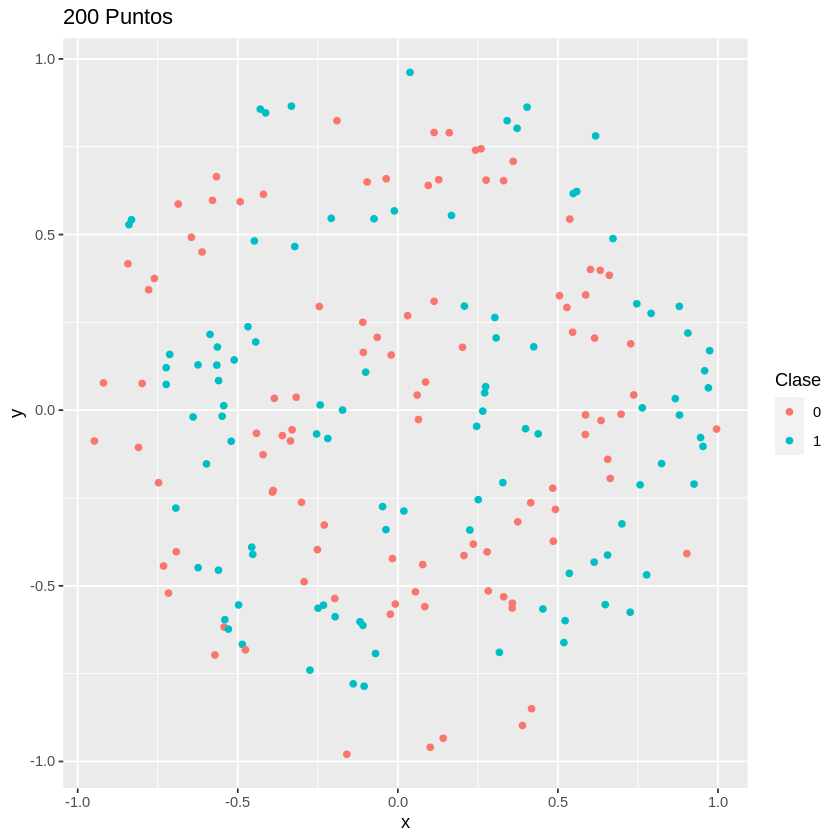

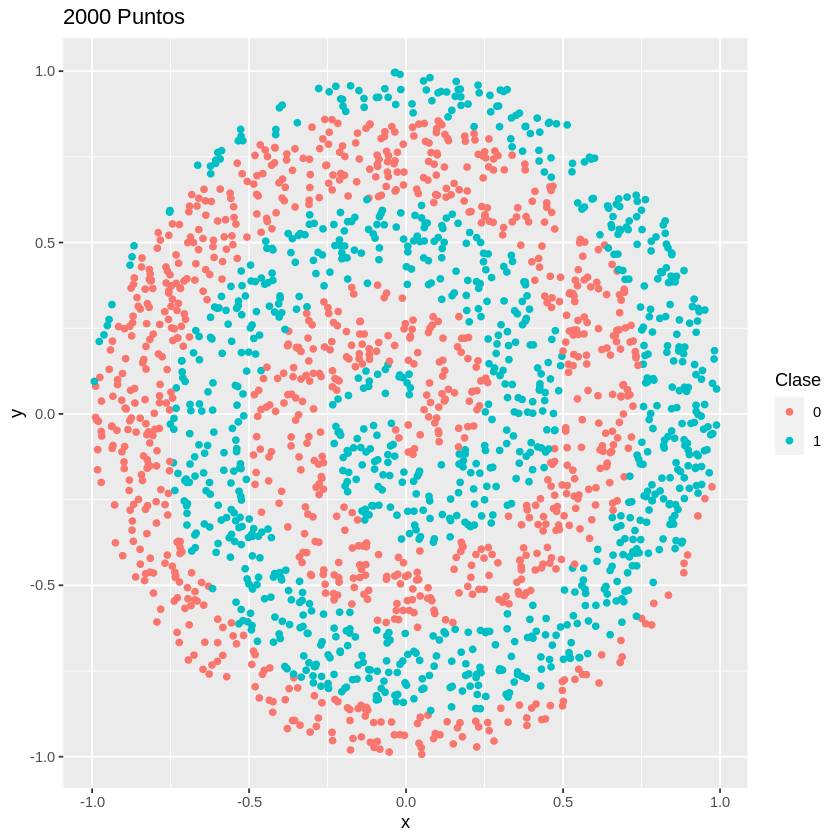

In [ ]:
spiralPoints200 <- espiral(200)
ggplot(spiralPoints200, 
       aes(x=x, 
           y=y, 
           color = factor(class))) +
  geom_point() + 
  labs(title = "200 Puntos", colour  = "Clase") 

spiralPoints2000 <- espiral(2000)
ggplot(spiralPoints2000, 
       aes(x=x, 
           y=y, 
           color = factor(class))) +
  geom_point() + 
  labs(title = "2000 Puntos", colour  = "Clase") 